![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [1]:
import numpy as np
import pandas as pd

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [3]:
df = pd.read_csv('datasets_beers.csv')
df.head(10)

Unnamed: 0    abv  ibu    id                 name  \
0           0  0.050  NaN  1436             Pub Beer   
1           1  0.066  NaN  2265          Devil's Cup   
2           2  0.071  NaN  2264  Rise of the Phoenix   
3           3  0.090  NaN  2263             Sinister   
4           4  0.075  NaN  2262        Sex and Candy   
5           5  0.077  NaN  2261         Black Exodus   
6           6  0.045  NaN  2260  Lake Street Express   
7           7  0.065  NaN  2259              Foreman   
8           8  0.055  NaN  2258                 Jade   
9           9  0.086  NaN  2131         Cone Crusher   

                            style  brewery_id  ounces  
0             American Pale Lager         408    12.0  
1         American Pale Ale (APA)         177    12.0  
2                    American IPA         177    12.0  
3  American Double / Imperial IPA         177    12.0  
4                    American IPA         177    12.0  
5                   Oatmeal Stout         177    12.0  
6         American Pale Ale (APA)         177    12.0  
7                 American Porter         177    12.0  
8         American Pale Ale (APA)         177    12.0  
9  American Double / Imperial IPA         177    12.0

In [4]:
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [5]:
df.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [6]:
# df = df.drop('Unnamed: 0', axis=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces  
0         408    12.0  
1         177    12.0  
2         177    12.0  
3         177    12.0  
4         177    12.0

## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [7]:
print('Filas', df.shape[0])
print('Columna', df.shape[1])

Filas 2410
Columna 7


In [8]:
print(len(df))
print(len(df.columns))


2410
7


## Ejercicio 5
¿De qué tipo son los datos?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [11]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [14]:
df.describe()

abv          ibu           id   brewery_id       ounces
count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
mean      0.059773    42.713167  1431.113278   231.749793    13.592241
std       0.013542    25.954066   752.459975   157.685604     2.352204
min       0.001000     4.000000     1.000000     0.000000     8.400000
25%       0.050000    21.000000   808.250000    93.000000    12.000000
50%       0.056000    35.000000  1453.500000   205.000000    12.000000
75%       0.067000    64.000000  2075.750000   366.000000    16.000000
max       0.128000   138.000000  2692.000000   557.000000    32.000000

## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [17]:
df['style'].value_counts()[0:20]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Pale Lager                39
American Stout                     39
Cider                              37
German Pilsener                    36
American Black Ale                 36
Märzen / Oktoberfest               30
American Amber / Red Lager         29
Name: style, dtype: int64

In [23]:
df.groupby(['style'])['name'].count().sort_values(ascending=False)[0:20]

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Pale Lager                39
American Stout                     39
Cider                              37
American Black Ale                 36
German Pilsener                    36
Märzen / Oktoberfest               30
Cream Ale                          29
Name: name, dtype: int64

In [29]:
df['style'].nunique()

99

In [30]:
len(df['style'].unique())

100

In [31]:
df[df['style'].isna()]

abv   ibu    id                            name style  brewery_id  \
566     NaN   NaN  2210                 Special Release   NaN          29   
853   0.060  21.0  1635  Kilt Lifter Scottish-Style Ale   NaN         160   
866   0.053  27.0  2527                   OktoberFiesta   NaN          66   
1554    NaN   NaN  1796                    The CROWLER™   NaN         166   
1555    NaN   NaN  1790            CAN'D AID Foundation   NaN         166   

      ounces  
566     16.0  
853     12.0  
866     12.0  
1554    32.0  
1555    12.0

## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [37]:
df.head()

abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces  
0         408    12.0  
1         177    12.0  
2         177    12.0  
3         177    12.0  
4         177    12.0

In [38]:
df.iloc[9:20, :]

abv   ibu    id                         name  \
9   0.086   NaN  2131                 Cone Crusher   
10  0.072   NaN  2099            Sophomoric Saison   
11  0.073   NaN  2098        Regional Ring Of Fire   
12  0.069   NaN  2097                   Garce Selé   
13  0.085   NaN  1980              Troll Destroyer   
14  0.061  60.0  1979                 Bitter Bitch   
15  0.060   NaN  2318                  Ginja Ninja   
16  0.060   NaN  2170                Cherried Away   
17  0.060   NaN  2169                 Rhubarbarian   
18  0.060   NaN  1502                  BrightCider   
19  0.082   NaN  1593  He Said Baltic-Style Porter   

                             style  brewery_id  ounces  
9   American Double / Imperial IPA         177    12.0  
10          Saison / Farmhouse Ale         177    12.0  
11          Saison / Farmhouse Ale         177    12.0  
12          Saison / Farmhouse Ale         177    12.0  
13                     Belgian IPA         177    12.0  
14         American Pale Ale (APA)         177    12.0  
15                           Cider         154    12.0  
16                           Cider         154    12.0  
17                           Cider         154    12.0  
18                           Cider         154    12.0  
19                   Baltic Porter         368    12.0

In [39]:
df.iloc[9:20, 3:]

name                           style  brewery_id  \
9                  Cone Crusher  American Double / Imperial IPA         177   
10            Sophomoric Saison          Saison / Farmhouse Ale         177   
11        Regional Ring Of Fire          Saison / Farmhouse Ale         177   
12                   Garce Selé          Saison / Farmhouse Ale         177   
13              Troll Destroyer                     Belgian IPA         177   
14                 Bitter Bitch         American Pale Ale (APA)         177   
15                  Ginja Ninja                           Cider         154   
16                Cherried Away                           Cider         154   
17                 Rhubarbarian                           Cider         154   
18                  BrightCider                           Cider         154   
19  He Said Baltic-Style Porter                   Baltic Porter         368   

    ounces  
9     12.0  
10    12.0  
11    12.0  
12    12.0  
13    12.0  
14    12.0  
15    12.0  
16    12.0  
17    12.0  
18    12.0  
19    12.0

In [40]:
df.iloc[9:20][['name','style','brewery_id','ounces']]

name                           style  brewery_id  \
9                  Cone Crusher  American Double / Imperial IPA         177   
10            Sophomoric Saison          Saison / Farmhouse Ale         177   
11        Regional Ring Of Fire          Saison / Farmhouse Ale         177   
12                   Garce Selé          Saison / Farmhouse Ale         177   
13              Troll Destroyer                     Belgian IPA         177   
14                 Bitter Bitch         American Pale Ale (APA)         177   
15                  Ginja Ninja                           Cider         154   
16                Cherried Away                           Cider         154   
17                 Rhubarbarian                           Cider         154   
18                  BrightCider                           Cider         154   
19  He Said Baltic-Style Porter                   Baltic Porter         368   

    ounces  
9     12.0  
10    12.0  
11    12.0  
12    12.0  
13    12.0  
14    12.0  
15    12.0  
16    12.0  
17    12.0  
18    12.0  
19    12.0

In [41]:
df.loc[9:19, 'name':]

name                           style  brewery_id  \
9                  Cone Crusher  American Double / Imperial IPA         177   
10            Sophomoric Saison          Saison / Farmhouse Ale         177   
11        Regional Ring Of Fire          Saison / Farmhouse Ale         177   
12                   Garce Selé          Saison / Farmhouse Ale         177   
13              Troll Destroyer                     Belgian IPA         177   
14                 Bitter Bitch         American Pale Ale (APA)         177   
15                  Ginja Ninja                           Cider         154   
16                Cherried Away                           Cider         154   
17                 Rhubarbarian                           Cider         154   
18                  BrightCider                           Cider         154   
19  He Said Baltic-Style Porter                   Baltic Porter         368   

    ounces  
9     12.0  
10    12.0  
11    12.0  
12    12.0  
13    12.0  
14    12.0  
15    12.0  
16    12.0  
17    12.0  
18    12.0  
19    12.0

In [42]:
df.iloc[9:20][['abv','ibu','ounces']]

abv   ibu  ounces
9   0.086   NaN    12.0
10  0.072   NaN    12.0
11  0.073   NaN    12.0
12  0.069   NaN    12.0
13  0.085   NaN    12.0
14  0.061  60.0    12.0
15  0.060   NaN    12.0
16  0.060   NaN    12.0
17  0.060   NaN    12.0
18  0.060   NaN    12.0
19  0.082   NaN    12.0

In [47]:
df.iloc[9:20][['abv','ibu','ounces']].values

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [48]:
df.iloc[9:20][['abv','ibu','ounces']].to_numpy()

array([[ 0.086,    nan, 12.   ],
       [ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [49]:
df['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [55]:
df.describe()

abv          ibu           id   brewery_id       ounces
count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
mean      0.059773    42.713167  1431.113278   231.749793    13.592241
std       0.013542    25.954066   752.459975   157.685604     2.352204
min       0.001000     4.000000     1.000000     0.000000     8.400000
25%       0.050000    21.000000   808.250000    93.000000    12.000000
50%       0.056000    35.000000  1453.500000   205.000000    12.000000
75%       0.067000    64.000000  2075.750000   366.000000    16.000000
max       0.128000   138.000000  2692.000000   557.000000    32.000000

In [53]:
round(df['ibu'].mean(),2)

42.71

In [54]:
print(df['ibu'].max())
print(df['ibu'].min())

138.0
4.0


In [58]:
df[df['ibu']==df['ibu'].max()][['ibu','name']]

ibu                       name
147  138.0  Bitter Bitch Imperial IPA

In [62]:
df[df['ibu']==df['ibu'].min()][['ibu','name']]

ibu                                  name
106  4.0                       Summer Solstice
112  4.0  Summer Solstice Cerveza Crema (2009)
117  4.0                Summer Solstice (2011)

In [64]:
df[(df['ibu']==df['ibu'].min())|(df['ibu']==df['ibu'].max())][['ibu','name']]

ibu                                  name
106    4.0                       Summer Solstice
112    4.0  Summer Solstice Cerveza Crema (2009)
117    4.0                Summer Solstice (2011)
147  138.0             Bitter Bitch Imperial IPA

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [66]:
print(df['ibu'].var())
print(df['ibu'].std())

673.6135373259929
25.954065911259317


In [68]:
# 25.95/(42.71+25.95)

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [69]:
df.corr()

abv       ibu        id  brewery_id    ounces
abv         1.000000  0.670621  0.042811   -0.098632  0.172529
ibu         0.670621  1.000000  0.000485   -0.004875  0.054691
id          0.042811  0.000485  1.000000   -0.504030  0.100843
brewery_id -0.098632 -0.004875 -0.504030    1.000000 -0.133762
ounces      0.172529  0.054691  0.100843   -0.133762  1.000000

In [70]:
# Existe una correlación positiva entre abv e ibu (coeficiente Pearson 0.67)

In [71]:
import seaborn as sns

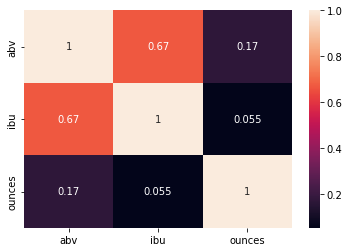

In [75]:
sns.heatmap(df[['abv','ibu','ounces']].corr(), annot=True);

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<AxesSubplot:>

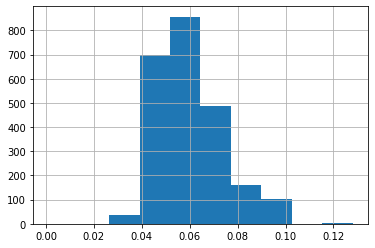

In [92]:
df['abv'].hist()

<AxesSubplot:xlabel='abv', ylabel='count'>

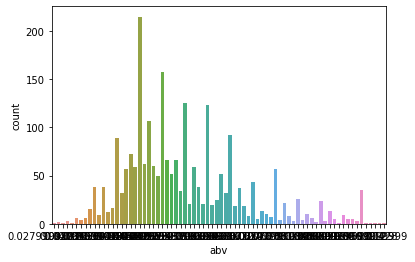

In [77]:
sns.countplot(x=df['abv'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [89]:
from scipy import stats

stats.skew(df['abv'].fillna(df['abv'].mean()))

0.9704287360715808

In [94]:
stats.skew(df[df['abv'].notna()]['abv'])

0.9578647103102429

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

<AxesSubplot:xlabel='abv'>

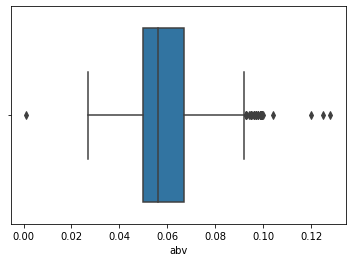

In [95]:
sns.boxplot(x = df['abv'])

<AxesSubplot:>

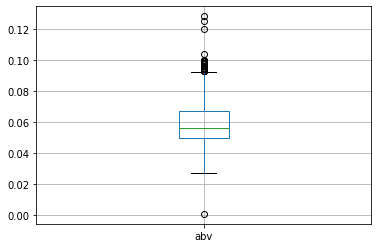

In [96]:
df.boxplot('abv')

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [110]:
df.groupby('style')[['abv']].mean().sort_values(['abv'], ascending=False).head(10)

abv
style                                     
English Barleywine                0.107667
Quadrupel (Quad)                  0.104000
American Barleywine               0.099000
American Malt Liquor              0.099000
Russian Imperial Stout            0.097636
American Double / Imperial Stout  0.093667
American Double / Imperial IPA    0.087369
Tripel                            0.086818
Baltic Porter                     0.085167
Belgian Strong Pale Ale           0.084000

In [111]:
df.groupby('style')[['ibu']].mean().sort_values(['ibu'], ascending=False).head(10)

ibu
style                                        
American Barleywine                 96.000000
American Double / Imperial IPA      93.320000
Russian Imperial Stout              86.500000
American Double / Imperial Pilsner  85.000000
Belgian Strong Dark Ale             72.000000
American Black Ale                  68.900000
American IPA                        67.634551
English Barleywine                  66.666667
English Stout                       66.000000
American Strong Ale                 65.416667

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [115]:
df2 = pd.read_csv('datasets_breweries.csv')
df2.head()

Unnamed: 0                       name           city state
0           0         NorthGate Brewing     Minneapolis    MN
1           1  Against the Grain Brewery     Louisville    KY
2           2   Jack's Abby Craft Lagers     Framingham    MA
3           3  Mike Hess Brewing Company      San Diego    CA
4           4    Fort Point Beer Company  San Francisco    CA

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [117]:
df2 = df2.rename(columns={'Unnamed: 0': 'brewery_id',
                          'name': 'brewery_name'})
df2.head()

brewery_id               brewery_name           city state
0           0         NorthGate Brewing     Minneapolis    MN
1           1  Against the Grain Brewery     Louisville    KY
2           2   Jack's Abby Craft Lagers     Framingham    MA
3           3  Mike Hess Brewing Company      San Diego    CA
4           4    Fort Point Beer Company  San Francisco    CA

## Ejercicio 18
Junta los dos datasets que tienes

In [120]:
display(df)
display(df2)

abv   ibu    id                  name                           style  \
0     0.050   NaN  1436              Pub Beer             American Pale Lager   
1     0.066   NaN  2265           Devil's Cup         American Pale Ale (APA)   
2     0.071   NaN  2264   Rise of the Phoenix                    American IPA   
3     0.090   NaN  2263              Sinister  American Double / Imperial IPA   
4     0.075   NaN  2262         Sex and Candy                    American IPA   
...     ...   ...   ...                   ...                             ...   
2405  0.067  45.0   928             Belgorado                     Belgian IPA   
2406  0.052   NaN   807         Rail Yard Ale        American Amber / Red Ale   
2407  0.055   NaN   620       B3K Black Lager                     Schwarzbier   
2408  0.055  40.0   145   Silverback Pale Ale         American Pale Ale (APA)   
2409  0.052   NaN    84  Rail Yard Ale (2009)        American Amber / Red Ale   

      brewery_id  ounces  
0            408    12.0  
1            177    12.0  
2            177    12.0  
3            177    12.0  
4            177    12.0  
...          ...     ...  
2405         424    12.0  
2406         424    12.0  
2407         424    12.0  
2408         424    12.0  
2409         424    12.0  

[2410 rows x 7 columns]

brewery_id                   brewery_name           city state
0             0             NorthGate Brewing     Minneapolis    MN
1             1      Against the Grain Brewery     Louisville    KY
2             2       Jack's Abby Craft Lagers     Framingham    MA
3             3      Mike Hess Brewing Company      San Diego    CA
4             4        Fort Point Beer Company  San Francisco    CA
..          ...                            ...            ...   ...
553         553            Covington Brewhouse      Covington    LA
554         554                Dave's Brewfarm         Wilson    WI
555         555          Ukiah Brewing Company          Ukiah    CA
556         556        Butternuts Beer and Ale  Garrattsville    NY
557         557  Sleeping Lady Brewing Company      Anchorage    AK

[558 rows x 4 columns]

In [123]:
# df3 = df.merge(df2, on='brewery_id')
df3 = pd.merge(df,df2, on='brewery_id')
df3.head()

abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces               brewery_name  city state  
0         408    12.0  10 Barrel Brewing Company  Bend    OR  
1         177    12.0        18th Street Brewery  Gary    IN  
2         177    12.0        18th Street Brewery  Gary    IN  
3         177    12.0        18th Street Brewery  Gary    IN  
4         177    12.0        18th Street Brewery  Gary    IN

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [124]:
df3['state'].nunique()

51

In [125]:
len(df3['state'].unique())

51

In [126]:
df3['city'].nunique()

384

In [127]:
df3['brewery_name'].nunique()

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [132]:
df3.groupby(['state','city'])['abv'].agg(['mean','median','max'])

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

In [131]:
# pd.set_option('display.max_rows', 50)

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [ ]:
# df_indiana = df3[df3['state'].str.contains('IN')]
# df_indiana_sorted = df_indiana.sort_values(['ibu'],ascending=False)
# df_indiana_sorted[['ibu','name']].head(10)

In [149]:
df3[df3['state'].str.contains('IN')].sort_values(['ibu'],ascending=False)[['ibu','name']].head(10)

ibu                            name
479   115.0                Hopkick Dropkick
2191  115.0           Overlord Imperial IPA
811   104.0                  Half Cycle IPA
2062   91.0                            Isis
2189   90.0                            Csar
850    90.0                      The Gadget
483    86.0                  3:33 Black IPA
1623   77.0               Mound Builder IPA
2047   77.0         Grapefruit Jungle (GFJ)
2064   77.0  Grapefruit Jungle (GFJ) (2011)

In [145]:
# df3['state'] = df3['state'].str[1:]
# df3['state'] = df3['state'].str.replace(' ','')
# df3[df3['state']=='IN']

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [160]:
df3.head()

abv  ibu    id                 name                           style  \
0  0.050  NaN  1436             Pub Beer             American Pale Lager   
1  0.066  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  0.071  NaN  2264  Rise of the Phoenix                    American IPA   
3  0.090  NaN  2263             Sinister  American Double / Imperial IPA   
4  0.075  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces               brewery_name  city state  
0         408    12.0  10 Barrel Brewing Company  Bend    OR  
1         177    12.0        18th Street Brewery  Gary    IN  
2         177    12.0        18th Street Brewery  Gary    IN  
3         177    12.0        18th Street Brewery  Gary    IN  
4         177    12.0        18th Street Brewery  Gary    IN

In [162]:
df3.describe()

abv          ibu           id   brewery_id       ounces
count  2348.000000  1405.000000  2410.000000  2410.000000  2410.000000
mean      0.059773    42.713167  1431.113278   231.749793    13.592241
std       0.013542    25.954066   752.459975   157.685604     2.352204
min       0.001000     4.000000     1.000000     0.000000     8.400000
25%       0.050000    21.000000   808.250000    93.000000    12.000000
50%       0.056000    35.000000  1453.500000   205.000000    12.000000
75%       0.067000    64.000000  2075.750000   366.000000    16.000000
max       0.128000   138.000000  2692.000000   557.000000    32.000000

In [158]:
df3.groupby('city')['ibu'].describe()

count        mean        std    min     25%    50%     75%  \
city                                                                         
Abingdon          1.0  135.000000        NaN  135.0  135.00  135.0  135.00   
Abita Springs     3.0   27.333333  21.455380   13.0   15.00   17.0   34.50   
Ada               0.0         NaN        NaN    NaN     NaN    NaN     NaN   
Afton             4.0   43.000000  19.899749   22.0   28.00   45.0   60.00   
Airway Heights    0.0         NaN        NaN    NaN     NaN    NaN     NaN   
...               ...         ...        ...    ...     ...    ...     ...   
Woodinville       4.0   46.750000  18.643587   27.0   39.75   44.0   51.00   
Worcester         1.0   69.000000        NaN   69.0   69.00   69.0   69.00   
Yakima            2.0   54.000000  22.627417   38.0   46.00   54.0   62.00   
Yardley           0.0         NaN        NaN    NaN     NaN    NaN     NaN   
York              4.0   44.250000  22.779742   20.0   35.00   41.0   50.25   

                  max  
city                   
Abingdon        135.0  
Abita Springs    52.0  
Ada               NaN  
Afton            60.0  
Airway Heights    NaN  
...               ...  
Woodinville      72.0  
Worcester        69.0  
Yakima           70.0  
Yardley           NaN  
York             75.0  

[384 rows x 8 columns]

## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [168]:
df_breweries_minabv = df3.groupby('brewery_name', as_index=False)[['abv']].min()
df_breweries_minabv

brewery_name    abv
0           10 Barrel Brewing Company  0.050
1                 18th Street Brewery  0.045
2                  2 Towns Ciderhouse  0.060
3              21st Amendment Brewery  0.044
4                 3 Daughters Brewing  0.050
..                                ...    ...
546              Woodchuck Hard Cider  0.050
547  Woodstock Inn, Station & Brewery  0.028
548                  Wormtown Brewery  0.065
549            Worthy Brewing Company  0.045
550           Wynkoop Brewing Company  0.042

[551 rows x 2 columns]

In [175]:
df_brew_f = df_breweries_minabv[df_breweries_minabv['abv']>0.07]
len(df_brew_f)

16

In [177]:
# len(pd.merge(df3, df_brew_f, on='brewery_name'))
len(df3[df3['brewery_name'].isin(df_brew_f['brewery_name'])])

26

In [171]:
df3[df3['abv'] >= 0.07][['name','brewery_name','abv']]

name               brewery_name    abv
2                      Rise of the Phoenix        18th Street Brewery  0.071
3                                 Sinister        18th Street Brewery  0.090
4                            Sex and Candy        18th Street Brewery  0.075
5                             Black Exodus        18th Street Brewery  0.077
9                             Cone Crusher        18th Street Brewery  0.086
...                                    ...                        ...    ...
2380                           P-51 Porter            Wingman Brewers  0.080
2382                  #002 American I.P.A.  Wisconsin Brewing Company  0.071
2398  Lights Out Vanilla Cream Extra Stout     Worthy Brewing Company  0.077
2402             Colorojo Imperial Red Ale    Wynkoop Brewing Company  0.082
2404           Rocky Mountain Oyster Stout    Wynkoop Brewing Company  0.075

[501 rows x 3 columns]

In [172]:
df_breweries_minabv[df_breweries_minabv['brewery_name']=="18th Street Brewery"]

brewery_name    abv
1  18th Street Brewery  0.045

In [173]:
df3[df3['brewery_name']=="18th Street Brewery"]

abv   ibu    id                   name                           style  \
1   0.066   NaN  2265            Devil's Cup         American Pale Ale (APA)   
2   0.071   NaN  2264    Rise of the Phoenix                    American IPA   
3   0.090   NaN  2263               Sinister  American Double / Imperial IPA   
4   0.075   NaN  2262          Sex and Candy                    American IPA   
5   0.077   NaN  2261           Black Exodus                   Oatmeal Stout   
6   0.045   NaN  2260    Lake Street Express         American Pale Ale (APA)   
7   0.065   NaN  2259                Foreman                 American Porter   
8   0.055   NaN  2258                   Jade         American Pale Ale (APA)   
9   0.086   NaN  2131           Cone Crusher  American Double / Imperial IPA   
10  0.072   NaN  2099      Sophomoric Saison          Saison / Farmhouse Ale   
11  0.073   NaN  2098  Regional Ring Of Fire          Saison / Farmhouse Ale   
12  0.069   NaN  2097             Garce Selé          Saison / Farmhouse Ale   
13  0.085   NaN  1980        Troll Destroyer                     Belgian IPA   
14  0.061  60.0  1979           Bitter Bitch         American Pale Ale (APA)   

    brewery_id  ounces         brewery_name  city state  
1          177    12.0  18th Street Brewery  Gary    IN  
2          177    12.0  18th Street Brewery  Gary    IN  
3          177    12.0  18th Street Brewery  Gary    IN  
4          177    12.0  18th Street Brewery  Gary    IN  
5          177    12.0  18th Street Brewery  Gary    IN  
6          177    12.0  18th Street Brewery  Gary    IN  
7          177    12.0  18th Street Brewery  Gary    IN  
8          177    12.0  18th Street Brewery  Gary    IN  
9          177    12.0  18th Street Brewery  Gary    IN  
10         177    12.0  18th Street Brewery  Gary    IN  
11         177    12.0  18th Street Brewery  Gary    IN  
12         177    12.0  18th Street Brewery  Gary    IN  
13         177    12.0  18th Street Brewery  Gary    IN  
14         177    12.0  18th Street Brewery  Gary    IN

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [178]:
df3['ibu'].mean()

42.71316725978647

In [183]:
df_states_m = df3.groupby('state', as_index=False)['ibu'].mean()
df_states_m.head()

state        ibu
0    AK  40.882353
1    AL  51.222222
2    AR  39.000000
3    AZ  35.208333
4    CA  46.281481

In [184]:
df_states_f = df_states_m[df_states_m['ibu']>df3['ibu'].mean()]
df_states_f.head()

state        ibu
1    AL  51.222222
4    CA  46.281481
5    CO  47.431507
7    DC  55.250000
8    DE  52.000000

In [185]:
df3[df3['state'].isin(df_states_f['state'])]

abv   ibu    id                  name                           style  \
0     0.050   NaN  1436              Pub Beer             American Pale Lager   
1     0.066   NaN  2265           Devil's Cup         American Pale Ale (APA)   
2     0.071   NaN  2264   Rise of the Phoenix                    American IPA   
3     0.090   NaN  2263              Sinister  American Double / Imperial IPA   
4     0.075   NaN  2262         Sex and Candy                    American IPA   
...     ...   ...   ...                   ...                             ...   
2405  0.067  45.0   928             Belgorado                     Belgian IPA   
2406  0.052   NaN   807         Rail Yard Ale        American Amber / Red Ale   
2407  0.055   NaN   620       B3K Black Lager                     Schwarzbier   
2408  0.055  40.0   145   Silverback Pale Ale         American Pale Ale (APA)   
2409  0.052   NaN    84  Rail Yard Ale (2009)        American Amber / Red Ale   

      brewery_id  ounces               brewery_name    city state  
0            408    12.0  10 Barrel Brewing Company    Bend    OR  
1            177    12.0        18th Street Brewery    Gary    IN  
2            177    12.0        18th Street Brewery    Gary    IN  
3            177    12.0        18th Street Brewery    Gary    IN  
4            177    12.0        18th Street Brewery    Gary    IN  
...          ...     ...                        ...     ...   ...  
2405         424    12.0    Wynkoop Brewing Company  Denver    CO  
2406         424    12.0    Wynkoop Brewing Company  Denver    CO  
2407         424    12.0    Wynkoop Brewing Company  Denver    CO  
2408         424    12.0    Wynkoop Brewing Company  Denver    CO  
2409         424    12.0    Wynkoop Brewing Company  Denver    CO  

[1288 rows x 10 columns]